# This notebook shows implementation of a simple RNN to predict handwritten digits (MNIST)

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [4]:
np.random.seed(42)

## Load and prepare MNIST data

In [12]:
input_shape = (28, 28)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

## Create and train model

In [33]:
model = Sequential()
model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.7627 - accuracy: 0.7191 - val_loss: 0.4815 - val_accuracy: 0.8350
Epoch 2/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.4889 - accuracy: 0.8278 - val_loss: 0.4399 - val_accuracy: 0.8347
Epoch 3/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.4127 - accuracy: 0.8517 - val_loss: 0.3847 - val_accuracy: 0.8550
Epoch 4/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.3794 - accuracy: 0.8627 - val_loss: 0.3461 - val_accuracy: 0.8745
Epoch 5/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3547 - accuracy: 0.8717 - val_loss: 0.3555 - val_accuracy: 0.8677
Epoch 6/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3369 - accuracy: 0.8780 - val_loss: 0.3491 - val_accuracy: 0.8720
Epoch 7/20
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3345 - accuracy: 0.8799 - val_loss: 0.3032 -

## Evaluate model

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.899399995803833


In [35]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

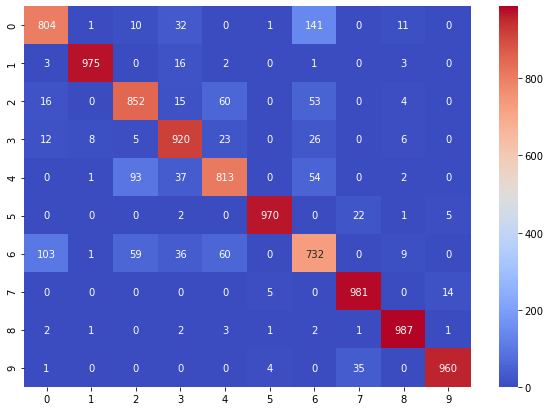

In [36]:
target_names = ['0','1','2','3','4','5','6','7','8','9']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")